In [ ]:
import tensorflow as tf
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from keras import layers, models
import pathlib
import natsort


In [ ]:
from google.colab import drive , files

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Func to plot generated iamges and real masks
def samples(generator, images, realMasks):
  masks = tf.squeeze(generator.predict(images))
  all = np.vstack([realMasks, masks])
  plt.figure(figsize = (12, 4))
  for i in range(16):
    plt.subplot(2, 8, (i + 1))
    plt.imshow(all[i], cmap = 'gray')
  plt.show()

In [ ]:
from tensorflow.keras.models import load_model

G = tf.keras.models.load_model('/content/drive/MyDrive/ToothGan/ToothGanFinal/mask_gen_f.h5')


In [ ]:
import os

def prepare_dataset(dataset_dir, split_ratio=0.8):
    image_dir = os.path.join(dataset_dir, "images")
    mask_dir = os.path.join(dataset_dir, "mask")

    image_filenames = os.listdir(image_dir)
    mask_filenames = os.listdir(mask_dir)

    return image_filenames, mask_filenames

dataset_dir = '/content/drive/MyDrive/ToothPics'

# Retrieve image and mask filenames
image_filenames, mask_filenames = prepare_dataset(dataset_dir)



In [ ]:
image_fn = natsort.natsorted(list(pathlib.Path("/content/drive/MyDrive/ToothPics/images").glob('*.*')))
mask_fn = natsort.natsorted(list(pathlib.Path("/content/drive/MyDrive/ToothPics/mask").glob('*.*')))


print(image_fn)
print(mask_fn)

[PosixPath('/content/drive/MyDrive/ToothPics/images/1.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/2.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/3.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/4.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/5.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/6.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/7.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/8.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/9.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/10.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/11.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/12.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/13.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/14.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/15.png'), PosixPath('/content/drive/MyDrive/ToothPics/images/16.png'), PosixPath('/content/drive/MyDriv

In [ ]:
import cv2
import numpy as np
from pathlib import Path

class ReadDataset:
    def __init__(self, imagesPath, masksPath):
        self.imagesPath = Path(imagesPath)
        self.masksPath = Path(masksPath)
        self.image_paths = []
        self.mask_paths = []

    def readPaths(self):
        self.image_paths = list(image_fn)[:5]
        self.mask_paths = list(mask_fn)[:5]

    def readImages(self, data, typeData):
        images = []
        for img_path in data:
            img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
            if img is None:
                print(f"Unable to read image: {img_path}")
                continue
            img = img / 255.0
            img = cv2.resize(img, (224, 224))
            if typeData == 'm':
                img = np.where(img > 0, 1, 0)
            images.append(img)
        return np.array(images)

#Dir
images_dir = '/content/drive/MyDrive/Toothpics/images'
masks_dir = '/content/drive/MyDrive/Toothpics/mask'

dobj = ReadDataset(images_dir, masks_dir)

dobj.readPaths()

images = dobj.readImages(dobj.image_paths, "i")
masks = dobj.readImages(dobj.mask_paths, "m")


In [ ]:
images.shape

(5, 224, 224)

In [ ]:
test = images[:15]
testmask = masks[:15]


In [ ]:
masks_pred = G.predict(test)
masks_pred = (masks_pred >= 0.5).astype('int')

1/1 [==============================] - 0s 40ms/step


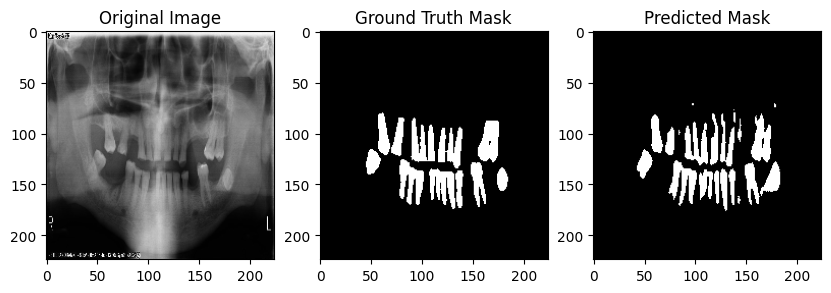

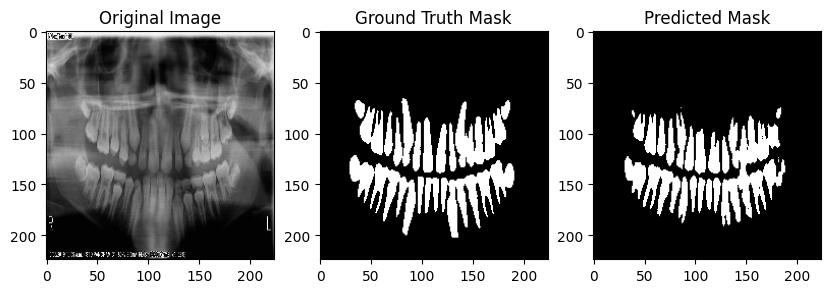

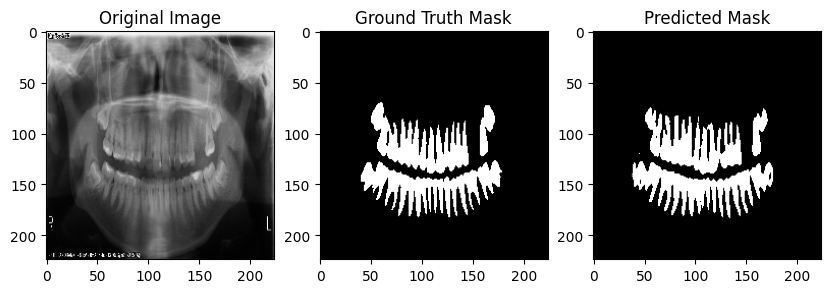

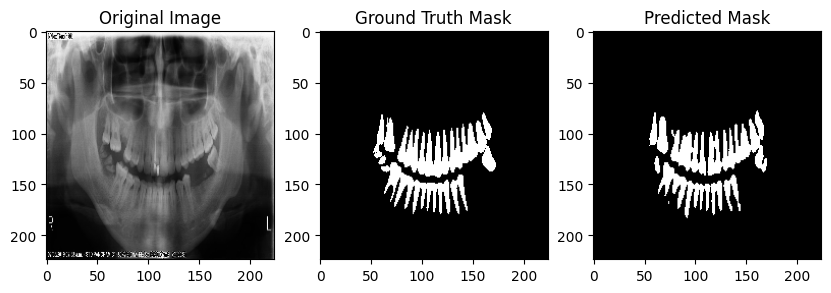

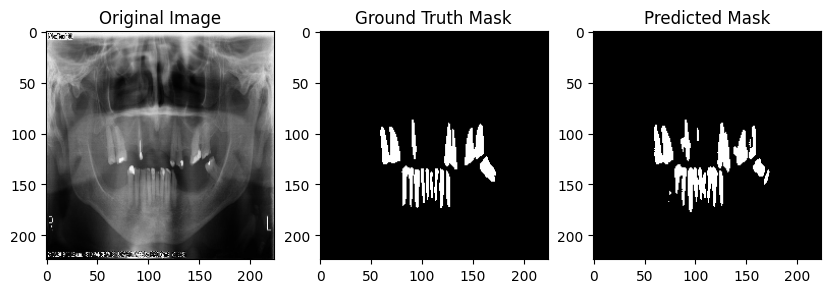

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(masks_pred)):
    plt.figure(figsize=(10, 5))


    plt.subplot(1, 3, 1)
    plt.imshow(test[i] , cmap = 'gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(testmask[i], cmap='gray')
    plt.title('Ground Truth Mask')


    plt.subplot(1, 3, 3)
    plt.imshow(masks_pred[i], cmap='gray')
    plt.title('Predicted Mask')

    plt.show()
